In [1]:
import cv2
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
if not os.path.exists("data"):
    os.makedirs("data/train")
    os.makedirs("data/train/01_palm")
    os.makedirs("data/train/02_fist")
    os.makedirs("data/train/03_thumbs-up")
    os.makedirs("data/train/04_thumbs-down")
    os.makedirs("data/train/05_index-right")
    os.makedirs("data/train/06_index-left")
    os.makedirs("data/train/07_no-gesture")
    os.makedirs("data/test")
    os.makedirs("data/test/01_palm")
    os.makedirs("data/test/02_fist")
    os.makedirs("data/test/03_thumbs-up")
    os.makedirs("data/test/04_thumbs-down")
    os.makedirs("data/test/05_index-right")
    os.makedirs("data/test/06_index-left")
    os.makedirs("data/test/07_no-gesture")

In [3]:

os.listdir('data')

['test', 'train']

In [4]:

os.listdir('data/train')

['01_palm',
 '02_fist',
 '03_thumbs-up',
 '04_thumbs-down',
 '05_index-right',
 '06_index-left',
 '07_no-gesture']

In [5]:
os.listdir('data/test')


['01_palm',
 '02_fist',
 '03_thumbs-up',
 '04_thumbs-down',
 '05_index-right',
 '06_index-left',
 '07_no-gesture']

In [6]:
print('Enter mode:')
mode = input()

Enter mode:
test


In [7]:
if mode == 'train':   
    directory = 'data/'+mode+'/'
else:
    directory = 'data/'+mode+'/'

In [8]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    # Simulating mirror image
    frame = cv2.flip(frame, 1)

    # Getting count of existing images
    count = {'palm': len(os.listdir(directory+"/01_palm")),
             'fist': len(os.listdir(directory+"/02_fist")),
             'thumbs-up': len(os.listdir(directory+"/03_thumbs-up")),
             'thumbs-down': len(os.listdir(directory+"/04_thumbs-down")),
             'index-right': len(os.listdir(directory+"/05_index-right")),
             'index-left': len(os.listdir(directory+"/06_index-left")),
             'no-gesture': len(os.listdir(directory+"/07_no-gesture")),
            }
    # Printing the count in each set to the screen
    cv2.putText(frame, "MODE: "+mode, (10, 50),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "IMAGE COUNT:", (10, 100), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Raised Hand(0):"+str(count['palm']), (10, 150), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Raised Fist(1):"+str(count['fist']), (10, 200), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Thumbs-Up(2):"+str(count['thumbs-up']), (10, 250), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Thumbs-Down(3):"+str(count['thumbs-down']), (10, 300), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Index Pointing Right (4):"+str(count['index-right']), (10, 350), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Index Pointing Left(5):"+str(count['index-left']), (10, 400), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "No gesture(6):"+str(count['no-gesture']), (10, 450), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)

    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0),3)
    # Extracting the ROI
    roi = frame[y1:y2, x1:x2]
    roi = cv2.resize(roi, (120, 120))

    cv2.imshow("Collecting data", frame)

    # do the processing after capturing the image!
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, roi = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
    cv2.imshow("ROI", roi)

    interrupt = cv2.waitKey(10)
    
    if interrupt & 0xFF == 27: # esc key
        break
    if interrupt & 0xFF == ord('0'):
        cv2.imwrite(directory+'01_palm/'+str(count['palm'])+'.jpg', roi)
    if interrupt & 0xFF == ord('1'):
        cv2.imwrite(directory+'02_fist/'+str(count['fist'])+'.jpg', roi)
    if interrupt & 0xFF == ord('2'):
        cv2.imwrite(directory+'03_thumbs-up/'+str(count['thumbs-up'])+'.jpg', roi)
    if interrupt & 0xFF == ord('3'):
        cv2.imwrite(directory+'04_thumbs-down/'+str(count['thumbs-down'])+'.jpg', roi)
    if interrupt & 0xFF == ord('4'):
        cv2.imwrite(directory+'05_index-right/'+str(count['index-right'])+'.jpg', roi)
    if interrupt & 0xFF == ord('5'):
        cv2.imwrite(directory+'06_index-left/'+str(count['index-left'])+'.jpg', roi)
    if interrupt & 0xFF == ord('6'):
        cv2.imwrite(directory+'07_no-gesture/'+str(count['no-gesture'])+'.jpg', roi)



cap.release()
cv2.destroyAllWindows()

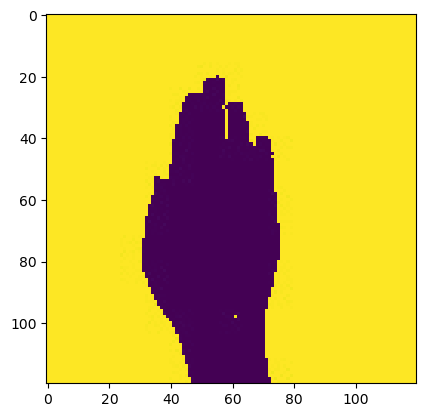

In [9]:
img = Image.open(r"C:\Users\Lenovo!\ENDGAME_GESTURE\data\train\01_palm\01_palm_40.jpg")
plt.imshow(img)

In [10]:
!pip install keras


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
print("ok")

ok


# MODEL 1(a)

In [12]:
# Step 1 - Building the CNN

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 1)))
model.add(MaxPooling2D((2, 2)))

# Second convolution layer and pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D((2, 2)))
# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))
print("ok")

ok


In [13]:
# Compiling the CNN
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing. 

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=7,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=7,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 1004 images belonging to 7 classes.
Found 357 images belonging to 7 classes.


In [15]:
history=model.fit(
        training_set,
        steps_per_epoch=len(training_set), # No of images in training set
        epochs=6,
        validation_data=test_set,
        validation_steps=50)# No of images in test set

Epoch 1/6
144/144 [==============================] - 33s 197ms/step - loss: 0.6881 - accuracy: 0.7918 - val_loss: 0.2211 - val_accuracy: 0.9371
Epoch 2/6
144/144 [==============================] - 28s 192ms/step - loss: 0.2404 - accuracy: 0.9213 - val_loss: 0.1790 - val_accuracy: 0.9514
Epoch 3/6
144/144 [==============================] - 28s 194ms/step - loss: 0.1222 - accuracy: 0.9631 - val_loss: 0.1878 - val_accuracy: 0.9400
Epoch 4/6
144/144 [==============================] - 28s 193ms/step - loss: 0.1019 - accuracy: 0.9631 - val_loss: 0.1141 - val_accuracy: 0.9857
Epoch 5/6
144/144 [==============================] - 28s 193ms/step - loss: 0.0749 - accuracy: 0.9721 - val_loss: 0.0633 - val_accuracy: 0.9914
Epoch 6/6
144/144 [==============================] - 28s 192ms/step - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.1180 - val_accuracy: 0.9771


In [16]:
train_loss, train_acc = model.evaluate(training_set)

print('Train accuracy: {:2.2f}%'.format(train_acc*100))

144/144 [==============================] - 8s 53ms/step - loss: 0.0563 - accuracy: 0.9781
Train accuracy: 97.81%


In [17]:

test_loss, test_acc = model.evaluate(test_set)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

51/51 [==============================] - 2s 46ms/step - loss: 0.1157 - accuracy: 0.9776
Test accuracy: 97.76%


# Model 1(b)

In [18]:
# Step 1 - Building the CNN

# Initializing the CNN
model1b = Sequential()

# First convolution layer and pooling
model1b.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 1)))
model1b.add(MaxPooling2D((2, 2)))

# Second convolution layer and pooling
model1b.add(Conv2D(64, (3, 3), activation='relu'))
model1b.add(MaxPooling2D((2, 2)))

# Third convolution layer
model1b.add(Conv2D(128, (3, 3), activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
model1b.add(MaxPooling2D((2, 2)))
# Flattening the layers
model1b.add(Flatten())

# Adding a fully connected layer
model1b.add(Dense(256, activation='relu'))
model1b.add(Dense(7, activation='softmax'))
print("ok")

ok


In [19]:
# Compiling the CNN
model1b.compile(optimizer='rmsprop', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing. 
print("ok")

ok


In [20]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=7,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=7,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 1004 images belonging to 7 classes.
Found 357 images belonging to 7 classes.


In [21]:
history=model1b.fit(
        training_set,
        steps_per_epoch=len(training_set), # No of images in training set
        epochs=6,
        validation_data=test_set,
        validation_steps=50)# No of images in test set

Epoch 1/6
144/144 [==============================] - 30s 190ms/step - loss: 0.7854 - accuracy: 0.7649 - val_loss: 0.1647 - val_accuracy: 0.9486
Epoch 2/6
144/144 [==============================] - 27s 186ms/step - loss: 0.2172 - accuracy: 0.9273 - val_loss: 0.1515 - val_accuracy: 0.9543
Epoch 3/6
144/144 [==============================] - 27s 191ms/step - loss: 0.1219 - accuracy: 0.9602 - val_loss: 0.0995 - val_accuracy: 0.9686
Epoch 4/6
144/144 [==============================] - 27s 186ms/step - loss: 0.1072 - accuracy: 0.9651 - val_loss: 0.0798 - val_accuracy: 0.9857
Epoch 5/6
144/144 [==============================] - 24s 163ms/step - loss: 0.0896 - accuracy: 0.9731 - val_loss: 0.1884 - val_accuracy: 0.9600
Epoch 6/6
144/144 [==============================] - 27s 186ms/step - loss: 0.0497 - accuracy: 0.9880 - val_loss: 0.2640 - val_accuracy: 0.9571


In [22]:
train_loss, train_acc = model1b.evaluate(training_set)

print('Train accuracy: {:2.2f}%'.format(train_acc*100))

144/144 [==============================] - 8s 52ms/step - loss: 0.0242 - accuracy: 0.9920
Train accuracy: 99.20%


In [23]:
test_loss, test_acc = model1b.evaluate(test_set)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

51/51 [==============================] - 2s 45ms/step - loss: 0.2796 - accuracy: 0.9552
Test accuracy: 95.52%


# MODEL 2 

In [24]:
# Step 1 - Building the CNN

# Initializing the CNN
model2 = Sequential()

# First convolution layer and pooling
model2.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 120, 1)))
model2.add(MaxPooling2D((2, 2)))

# Second convolution layer and pooling
model2.add(Conv2D(64, (7, 7), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

# Flattening the layers
model2.add(Flatten())

# Adding a fully connected layer
model2.add(Dense(256, activation='relu'))
model2.add(Dense(7, activation='softmax'))
print("ok")

ok


In [25]:
# Compiling the CNN
model2.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing. 

In [26]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=7,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=7,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 1004 images belonging to 7 classes.
Found 357 images belonging to 7 classes.


In [27]:
history=model2.fit(
        training_set,
        steps_per_epoch=len(training_set), # No of images in training set
        epochs=6,
        validation_data=test_set,
        validation_steps=50)# No of images in test set

Epoch 1/6
144/144 [==============================] - 34s 211ms/step - loss: 0.7587 - accuracy: 0.8008 - val_loss: 0.3213 - val_accuracy: 0.9657
Epoch 2/6
144/144 [==============================] - 28s 197ms/step - loss: 0.2802 - accuracy: 0.9402 - val_loss: 0.2403 - val_accuracy: 0.9314
Epoch 3/6
144/144 [==============================] - 29s 202ms/step - loss: 0.1198 - accuracy: 0.9661 - val_loss: 0.1198 - val_accuracy: 0.9743
Epoch 4/6
144/144 [==============================] - 29s 202ms/step - loss: 0.0685 - accuracy: 0.9771 - val_loss: 0.1374 - val_accuracy: 0.9771
Epoch 5/6
144/144 [==============================] - 30s 205ms/step - loss: 0.0683 - accuracy: 0.9781 - val_loss: 0.1426 - val_accuracy: 0.9829
Epoch 6/6
144/144 [==============================] - 29s 203ms/step - loss: 0.0366 - accuracy: 0.9930 - val_loss: 0.2245 - val_accuracy: 0.9686


In [28]:
train_loss, train_acc = model2.evaluate(training_set)

print('Train accuracy: {:2.2f}%'.format(train_acc*100))

144/144 [==============================] - 5s 34ms/step - loss: 0.0266 - accuracy: 0.9900
Train accuracy: 99.00%


In [29]:
test_loss, test_acc = model2.evaluate(test_set)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

51/51 [==============================] - 2s 32ms/step - loss: 0.2201 - accuracy: 0.9692
Test accuracy: 96.92%


In [30]:
model2.save('handrecognition_model.hdf5')
model2.summary()

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 116, 116, 32)      832       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 58, 58, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 64)        100416    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 43264)             0         
                                                                 
 dense_4 (Dense)             (None, 256)              

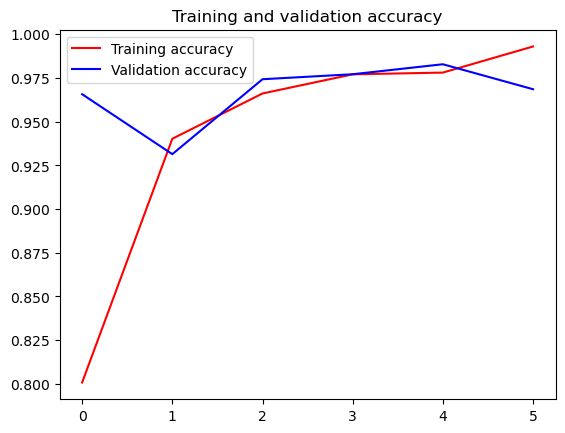

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()



plt.show()

<Figure size 640x480 with 0 Axes>

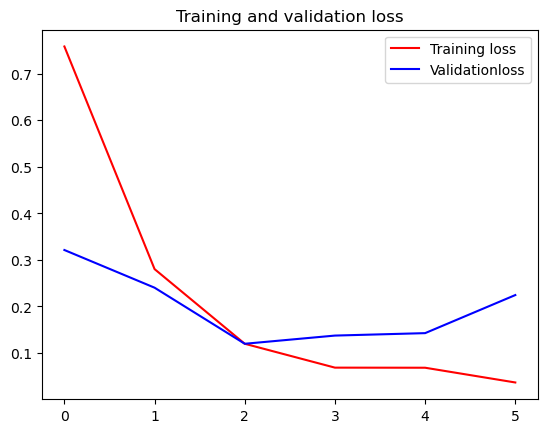

<Figure size 640x480 with 0 Axes>

In [32]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validationloss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [33]:
import tensorflow as tf

# Assuming you have defined and instantiated your model named model2

# Save the model architecture to JSON
model_json = model2.to_json()
with open("gesture-model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
model2.save_weights('gesture-model.h5')

#Hand Gesture Prediction and Media control

In [34]:
import numpy as np
from keras.models import model_from_json
import operator
import cv2
import sys, os
import pyautogui
import time

In [35]:
json_file = open("gesture-model.json", "r")
model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(model_json)
# load weights into new model
loaded_model.load_weights("gesture-model.h5")
print("Loaded model from disk")

Loaded model from disk


In [36]:
final_label = ""
action=""

In [39]:
vid = cv2.VideoCapture(0)
while (vid.isOpened()):

    ret,frame = vid.read()
    if ret:
            frame = cv2.flip(frame, 1)

            # Got this from collect-data.py
            # Coordinates of the ROI
            x1 = int(0.5*frame.shape[1])
            y1 = 10
            x2 = frame.shape[1]-10
            y2 = int(0.5*frame.shape[1])
            # Drawing the ROI
            # The increment/decrement by 1 is to compensate for the bounding box
            cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0),3)
            # Extracting the ROI
            roi = frame[y1:y2, x1:x2]

            # Resizing the ROI so it can be fed to the model for prediction
            roi = cv2.resize(roi, (120, 120))
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            _, test_image = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
            cv2.imshow("Test Image", test_image)
            result = loaded_model.predict(test_image.reshape(1, 120, 120, 1))
            prediction = {'palm': result[0][0],
                          'fist': result[0][1],
                          'thumbs-up': result[0][2],
                          'thumbs-down': result[0][3],
                          'index-right': result[0][4],
                          'index-left': result[0][5],
                          'no-gesture':result[0][6]}
                # Sorting based on top prediction
            prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)

            if(prediction[0][0] == 'palm'):
                final_label = 'palm'
                action = "PLAY/PAUSE"
                pyautogui.press('playpause', presses=1)
            elif (prediction[0][0] == 'fist'):
                final_label = 'fist'
                action = "MUTE"
                pyautogui.press('volumemute', presses=1)
            elif (prediction[0][0] == 'thumbs-up'):
                final_label = "thumbs-up"
                action = "VOLUME UP"
                pyautogui.press('volumeup', presses=1)
            elif (prediction[0][0] == "thumbs-down"):
                final_label = "thumbs-down"
                action = "VOLUME DOWN"
                pyautogui.press('volumedown', presses=1)
            elif (prediction[0][0] == "index-right"):
                final_label = "index-right"
                action = "FORWARD"
                pyautogui.press('nexttrack', presses=1)
            elif (prediction[0][0] == "index-left"):
                final_label = "index-left"
                action = "REWIND"
                pyautogui.press('prevtrack', presses=1)
            elif (prediction[0][0] == "no-gesture"):
                final_label = "no-gesture"
                action = "NO-ACTION"
            text1= "Gesture: {}".format(final_label)
            text2= "Action:{}".format(action)

            cv2.putText(frame, text1 , (10, 120), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
            cv2.putText(frame, text2 , (10, 220), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
            cv2.imshow("Hand Gesture Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
vid.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 30ms/step


# MODEL 3

In [41]:
# Step 1 - Building the CNN

# Initializing the CNN
model3 = Sequential()

# First convolution layer and pooling
model3.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 120, 1)))
model3.add(MaxPooling2D((2, 2)))

# Second convolution layer and pooling
model3.add(Conv2D(64, (7, 7), activation='relu'))
model3.add(MaxPooling2D((2, 2)))

# Third convolution layer
model3.add(Conv2D(128, (5, 5), activation='relu'))
model3.add(MaxPooling2D((9, 9)))


# Flattening the layers
model3.add(Flatten())


# Adding a fully connected layer
model3.add(Dense(256, activation='relu'))
model3.add(Dense(7, activation='softmax'))
print("ok")

ok


In [42]:
# Compiling the CNN
model3.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing. 

In [43]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=7,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=7,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 1004 images belonging to 7 classes.
Found 357 images belonging to 7 classes.


In [44]:
history=model3.fit(
        training_set,
        steps_per_epoch=len(training_set), # No of images in training set
        epochs=6,
        validation_data=test_set,
        validation_steps=50)# No of images in test set

Epoch 1/6
144/144 [==============================] - 49s 296ms/step - loss: 0.6508 - accuracy: 0.7998 - val_loss: 0.1567 - val_accuracy: 0.9286
Epoch 2/6
144/144 [==============================] - 42s 290ms/step - loss: 0.2177 - accuracy: 0.9432 - val_loss: 0.0326 - val_accuracy: 0.9943
Epoch 3/6
144/144 [==============================] - 42s 292ms/step - loss: 0.1272 - accuracy: 0.9641 - val_loss: 0.1106 - val_accuracy: 0.9857
Epoch 4/6
144/144 [==============================] - 42s 294ms/step - loss: 0.0992 - accuracy: 0.9671 - val_loss: 0.0381 - val_accuracy: 0.9971
Epoch 5/6
144/144 [==============================] - 42s 289ms/step - loss: 0.0600 - accuracy: 0.9781 - val_loss: 0.1031 - val_accuracy: 0.9800
Epoch 6/6
144/144 [==============================] - 42s 292ms/step - loss: 0.0597 - accuracy: 0.9801 - val_loss: 0.0381 - val_accuracy: 0.9943


In [45]:
train_loss, train_acc = model3.evaluate(training_set)

print('Train accuracy: {:2.2f}%'.format(train_acc*100))

144/144 [==============================] - 11s 77ms/step - loss: 0.0371 - accuracy: 0.9871
Train accuracy: 98.71%


In [46]:
test_loss, test_acc = model3.evaluate(test_set)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

51/51 [==============================] - 4s 74ms/step - loss: 0.0374 - accuracy: 0.9944
Test accuracy: 99.44%


#Calculating training and testing time for Model 1(a) 

In [ ]:
import time
from keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for training and testing sets
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and testing data
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=7,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=7,
                                            color_mode='grayscale',
                                            class_mode='categorical')

# Start time for training
start_time_train = time.time()

from keras.optimizers import Adam  # Import the optimizer (e.g., Adam)

# Compile the model with an optimizer, loss function, and metrics
optimizer = Adam()  # Instantiate the optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(
        training_set,
        steps_per_epoch=len(training_set), # No of images in training set
        epochs=6,
        validation_data=test_set,
        validation_steps=50)  # No of images in test set

# End time for training
end_time_train = time.time()

# Training time
training_time = end_time_train - start_time_train
print("Training time in seconds:", training_time)

# Start time for testing
start_time_test = time.time()

# Test the model
test_loss, test_acc = model.evaluate(test_set)

# End time for testing
end_time_test = time.time()

# Testing time
testing_time = end_time_test - start_time_test
print("Testing time in seconds:", testing_time)

# Print training and testing accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Train accuracy: {:2.2f}%'.format(train_acc * 100))

print('Test accuracy: {:2.2f}%'.format(test_acc * 100))


In [ ]:
import time
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for training and testing sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and testing data
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=7,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=7,
                                            color_mode='grayscale',
                                            class_mode='categorical')

# Define the CNN model
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape=(120, 120, 1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(7, activation='softmax'))  # 7 classes, so final layer has 7 neurons with softmax activation

# Compile the model with an optimizer, loss function, and metrics
optimizer = Adam()  # Instantiate the optimizer
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Start time for training
start_time_train = time.time()

# Train the model
history = model1.fit(
        training_set,
        steps_per_epoch=len(training_set), # No of images in training set
        epochs=6,
        validation_data=test_set,
        validation_steps=len(test_set))  # No of images in test set

# End time for training
end_time_train = time.time()

# Training time
training_time = end_time_train - start_time_train
print("Training time in seconds:", training_time)

# Start time for testing
start_time_test = time.time()

# Test the model
test_loss, test_acc = model1.evaluate(test_set)

# End time for testing
end_time_test = time.time()

# Testing time
testing_time = end_time_test - start_time_test
print("Testing time in seconds:", testing_time)

# Print training and testing accuracy
train_loss, train_acc = model1.evaluate(training_set)
print('Train accuracy: {:2.2f}%'.format(train_acc * 100))

print('Test accuracy: {:2.2f}%'.format(test_acc * 100))


#Calculating training and testing time for model1(b)

In [ ]:
import time
from keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for training and testing sets
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and testing data
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=7,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=7,
                                            color_mode='grayscale',
                                            class_mode='categorical')

# Start time for training
start_time_train = time.time()

from tensorflow.keras.optimizers import RMSprop  # Import the optimizer

# Compile the model with an optimizer, loss function, and metrics
optimizer = RMSprop()  # Instantiate the optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



# Train the model
history = model1b.fit(
        training_set,
        steps_per_epoch=len(training_set), # No of images in training set
        epochs=6,
        validation_data=test_set,
        validation_steps=50)  # No of images in test set

# End time for training
end_time_train = time.time()

# Training time
training_time = end_time_train - start_time_train
print("Training time:", training_time)

# Start time for testing
start_time_test = time.time()

# Test the model
test_loss, test_acc = model1b.evaluate(test_set)

# End time for testing
end_time_test = time.time()

# Testing time
testing_time = end_time_test - start_time_test
print("Testing time:", testing_time)

# Print training and testing accuracy
train_loss, train_acc = model1b.evaluate(training_set)
print('Train accuracy: {:2.2f}%'.format(train_acc * 100))

print('Test accuracy: {:2.2f}%'.format(test_acc * 100))


In [ ]:
import time
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for training and testing sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and testing data
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=7,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=7,
                                            color_mode='grayscale',
                                            class_mode='categorical')

# Define the CNN model
model1b = Sequential()

model1b.add(Conv2D(32, (3, 3), input_shape=(120, 120, 1), activation='relu'))
model1b.add(MaxPooling2D(pool_size=(2, 2)))

model1b.add(Conv2D(64, (3, 3), activation='relu'))
model1b.add(MaxPooling2D(pool_size=(2, 2)))

model1b.add(Conv2D(128, (3, 3), activation='relu'))
model1b.add(MaxPooling2D(pool_size=(2, 2)))

model1b.add(Flatten())
model1b.add(Dense(128, activation='relu'))
model1b.add(Dense(7, activation='softmax'))  # 7 classes, so final layer has 7 neurons with softmax activation

# Compile the model with an optimizer, loss function, and metrics
optimizer = Adam()  # Instantiate the optimizer
model1b.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Start time for training
start_time_train = time.time()

# Train the model
history = model1b.fit(
        training_set,
        steps_per_epoch=len(training_set), # No of images in training set
        epochs=6,
        validation_data=test_set,
        validation_steps=len(test_set))  # No of images in test set

# End time for training
end_time_train = time.time()

# Training time
training_time = end_time_train - start_time_train
print("Training time in seconds:", training_time)

# Start time for testing
start_time_test = time.time()

# Test the model
test_loss, test_acc = model1b.evaluate(test_set)

# End time for testing
end_time_test = time.time()

# Testing time
testing_time = end_time_test - start_time_test
print("Testing time in seconds:", testing_time)

# Print training and testing accuracy
train_loss, train_acc = model1b.evaluate(training_set)
print('Train accuracy: {:2.2f}%'.format(train_acc * 100))

print('Test accuracy: {:2.2f}%'.format(test_acc * 100))


# MODEL 3 FOR STREAMLIT 

In [52]:
model3.save('handrecognition_model3.hdf5')
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 116, 116, 32)      832       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 58, 58, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 64)        100416    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 26, 26, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 128)       204928    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 2, 2, 128)        

In [56]:
import tensorflow as tf

# Assuming you have defined and instantiated your model named model2

# Save the model architecture to JSON
model_json = model3.to_json()
with open("gesture-model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
model3.save_weights('gesture-model.h5')

In [57]:
import numpy as np
from keras.models import model_from_json
import operator
import cv2
import sys, os
import pyautogui
import time

In [58]:
json_file = open("gesture-model.json", "r")
model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(model_json)
# load weights into new model
loaded_model.load_weights("gesture-model.h5")
print("Loaded model from disk")

Loaded model from disk


In [59]:
final_label = ""
action=""

In [60]:
vid = cv2.VideoCapture(0)
while (vid.isOpened()):

    ret,frame = vid.read()
    if ret:
            frame = cv2.flip(frame, 1)

            # Got this from collect-data.py
            # Coordinates of the ROI
            x1 = int(0.5*frame.shape[1])
            y1 = 10
            x2 = frame.shape[1]-10
            y2 = int(0.5*frame.shape[1])
            # Drawing the ROI
            # The increment/decrement by 1 is to compensate for the bounding box
            cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0),3)
            # Extracting the ROI
            roi = frame[y1:y2, x1:x2]

            # Resizing the ROI so it can be fed to the model for prediction
            roi = cv2.resize(roi, (120, 120))
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            _, test_image = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
            cv2.imshow("Test Image", test_image)
            result = loaded_model.predict(test_image.reshape(1, 120, 120, 1))
            prediction = {'palm': result[0][0],
                          'fist': result[0][1],
                          'thumbs-up': result[0][2],
                          'thumbs-down': result[0][3],
                          'index-right': result[0][4],
                          'index-left': result[0][5],
                          'no-gesture':result[0][6]}
                # Sorting based on top prediction
            prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)

            if(prediction[0][0] == 'palm'):
                final_label = 'palm'
                action = "PLAY/PAUSE"
                pyautogui.press('playpause', presses=1)
            elif (prediction[0][0] == 'fist'):
                final_label = 'fist'
                action = "MUTE"
                pyautogui.press('volumemute', presses=1)
            elif (prediction[0][0] == 'thumbs-up'):
                final_label = "thumbs-up"
                action = "VOLUME UP"
                pyautogui.press('volumeup', presses=1)
            elif (prediction[0][0] == "thumbs-down"):
                final_label = "thumbs-down"
                action = "VOLUME DOWN"
                pyautogui.press('volumedown', presses=1)
            elif (prediction[0][0] == "index-right"):
                final_label = "index-right"
                action = "FORWARD"
                pyautogui.press('nexttrack', presses=1)
            elif (prediction[0][0] == "index-left"):
                final_label = "index-left"
                action = "REWIND"
                pyautogui.press('prevtrack', presses=1)
            elif (prediction[0][0] == "no-gesture"):
                final_label = "no-gesture"
                action = "NO-ACTION"
            text1= "Gesture: {}".format(final_label)
            text2= "Action:{}".format(action)

            cv2.putText(frame, text1 , (10, 120), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
            cv2.putText(frame, text2 , (10, 220), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
            cv2.imshow("Hand Gesture Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
vid.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [70]:
import streamlit as st
import cv2
import numpy as np
from keras.models import model_from_json
import operator
import pyautogui

# Load the pre-trained model
@st.cache(allow_output_mutation=True)
def load_model():
    # Load model architecture from JSON file
    json_file = open("gesture-model.json", "r")
    model_json = json_file.read()
    json_file.close()
    # Initialize the model
    loaded_model = model_from_json(model_json)
    # Load model weights
    loaded_model.load_weights("gesture-model.h5")
    return loaded_model

# Function to perform gesture recognition
def recognize_gesture(model, frame):
    # Preprocess the frame
    frame = cv2.flip(frame, 1)
    x1, y1, x2, y2 = 100, 100, 400, 400 # Define ROI coordinates
    roi = frame[y1:y2, x1:x2]
    roi = cv2.resize(roi, (120, 120))
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, test_image = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)

    # Predict gesture
    result = model.predict(test_image.reshape(1, 120, 120, 1))
    prediction = {
        'palm': result[0][0],
        'fist': result[0][1],
        'thumbs-up': result[0][2],
        'thumbs-down': result[0][3],
        'index-right': result[0][4],
        'index-left': result[0][5],
        'no-gesture': result[0][6]
    }
    # Sorting based on top prediction
    prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)
    gesture = prediction[0][0]
    return gesture

# Main function to run the Streamlit app
def main():
    st.title("Hand Gesture Recognition")

    # Load the model
    model = load_model()

    # Open the webcam
    vid = cv2.VideoCapture(0)

    # Run the gesture recognition loop
    while vid.isOpened():
        ret, frame = vid.read()
        if ret:
            # Perform gesture recognition
            gesture = recognize_gesture(model, frame)
            # Perform action based on gesture
            if gesture == 'palm':
                st.write("Gesture: Palm - Action: Play/Pause")
                pyautogui.press('playpause')
            elif gesture == 'fist':
                st.write("Gesture: Fist - Action: Mute")
                pyautogui.press('volumemute')
            # Add more conditions for other gestures

            # Display the frame with the recognized gesture
            st.image(frame, channels="BGR", caption="Hand Gesture Recognition")

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    # Release the webcam and close all OpenCV windows
    vid.release()
    cv2.destroyAllWindows()

if __name__ == '__main__':
    main()


InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `load_model()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function load_model at 0x0000020977706B60>
```

Please see the `hash_funcs` [documentation](https://docs.streamlit.io/library/advanced-features/caching#the-hash_funcs-parameter)
for more details.
            